# Aufgabe 3

In [2]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

df_P0_1k = pd.read_hdf("zwei_populationen.h5", key="P_0_1000")
df_P0_10k = pd.read_hdf("zwei_populationen.h5", key="P_0_10000")
df_P1 = pd.read_hdf("zwei_populationen.h5", key="P_1")

## Teilaufgabe a)
Wir betrachten zwei Populationen $P_0$ und $P_1$. Wir haben sie geladen und untersuchen zuerst zwei gleich große Populationen mit einer Größe von 10k. Zuerst werden die Mittelwerte berechnet.

In [3]:
P0_1k = df_P0_1k.values
P0_10k = df_P0_10k.values
P1 = df_P1.values

muP0 = np.array([np.mean(P0_10k, axis=0)])
muP0 = np.transpose(muP0) # Now it is a proper column vector
print('muP0 =', muP0)
muP1 = np.array([np.mean(P1, axis=0)])
muP1 = np.transpose(muP1)
print('muP1 =', muP1)

muP0 = [[-0.02743075]
 [ 2.97994465]]
muP1 = [[ 5.98644821]
 [ 3.0852829 ]]


## Teilaufgabe b)
Wir berechnen nun Streumatrizen. Dabei ist eine Streumatrix eine unnormierte Kovarianzmatrix, weswegen wir numpy zur Hilfe nehmen. Die Matrix $S_w$ ist dann die Intravarianzmatrix, die die Kovarianzen der einzelnen Populationen untereinander kombiniert. Die Intervarianzmatrix $S_b$ ist ein Maß für die Kovarianz zwiscen den beiden Populationen. Die Idee ist hier gerade, die Populationen so zu trennen, dass die Intervarianz maximiert und die Intravarianz minimiert wird. Es werden die Formeln aus der Vorlesung benutzt.

In [4]:
covP0 = np.size(P0_10k)*np.cov(P0_10k, ddof = 0, rowvar=False)
print('Streumatrix der ersten Pop =', covP0)
covP1 = np.size(P1)*np.cov(P1, ddof = 0, rowvar=False)
print('Streumatrix der zweiten Pop =', covP1)
# is this the combined covariance matrix
Sw = covP0 + covP1
print('Streumatrix der Intravarianz, Sw = S0 + S1 =', Sw)
SwInv = linalg.inv(Sw)
Sb = np.dot(muP0-muP1, np.transpose(muP0-muP1))
print('Streumatrix der Intervarianz, Sb =', Sb)

Streumatrix der ersten Pop = [[ 244154.15449573  163151.87999466]
 [ 163151.87999466  134443.81962687]]
Streumatrix der zweiten Pop = [[ 247019.0030075   148200.30134058]
 [ 148200.30134058  109535.34588752]]
Streumatrix der Intravarianz, Sw = S0 + S1 = [[ 491173.15750322  311352.18133524]
 [ 311352.18133524  243979.16551439]]
Streumatrix der Intervarianz, Sb = [[  3.61667401e+01   6.33491486e-01]
 [  6.33491486e-01   1.10961469e-02]]


## Teilaufgabe c)
Das aus der Vorlesung bekannte EW-Problem wird mit Linearen-Algebra-Paketen gelöst. Die Projektionsgerade hat dann als Richtungsvektor gerade den Eigenvektor, der zum größten Eigenwert gehört. Dieser kann nach Projektion auf die Gerade die Populationen am besten separieren.
Danach veranschaulichen wir die beiden Populationen in einem Streudiagramm und zeichnen die Projektionsgerade ein.

In [5]:
matrix = np.dot(SwInv,Sb)
[d, V] = linalg.eig(matrix,right=True) # d are the eigenvalues and in V the eigenvectors are stored
w = V[:,0] # get first column, it belongs to the greatest eigenvalue
# we call it w because lambda is a key word...
print('Der berechnete Eigenvektor ist =', w)

Der berechnete Eigenvektor ist = [ 0.61886608 -0.78549652]


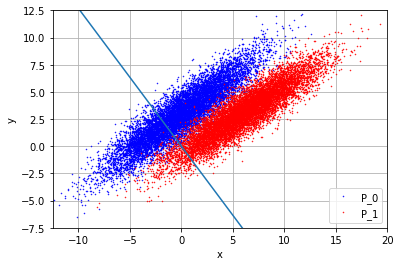

Die Geradengleichung wäre dann f(x)= -1.26925121068 * x, wenn die Gerade durch den Nullpunkt geht. Nach unserem Verständnis ist das okay so, weil für die Projektion der y-Achsenabschnitt keinen Unterschied machen sollte.


In [6]:
x0, y0 = zip(*P0_10k)
x1, y1 = zip(*P1)
linspace = np.linspace(-20,20,100)
plt.plot(x0, y0, 'b.', label='P_0', markersize=1)
plt.plot(x1, y1, 'r.', label='P_1', markersize=1)
plt.plot(linspace, w[1]/w[0]*linspace)
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-12.5,20,-7.5,12.5])
plt.show()
print('Die Geradengleichung wäre dann f(x)=', w[1]/w[0], '* x, wenn die Gerade durch den Nullpunkt geht. Nach unserem Verständnis ist das okay so, weil für die Projektion der y-Achsenabschnitt keinen Unterschied machen sollte.')

## Teilaufgabe d)
Nun werden die Punkte projeziert. Die neuen Werte ergeben sich aus dem Skalarprodukt von $\vec{\lambda}$ und $\vec{x}$.

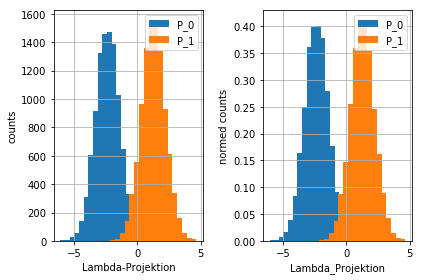

In [7]:
plt.clf()
projectionsP0 = np.dot(P0_10k, w)
projectionsP1 = np.dot(P1, w)
plt.subplot(1,2,1)
plt.hist(projectionsP0, label='P_0', bins=20)
plt.hist(projectionsP1, label='P_1', bins=20)
plt.grid()
plt.legend()
plt.xlabel('Lambda-Projektion')
plt.ylabel('counts')
plt.subplot(1,2,2)
plt.hist(projectionsP0, normed=True, label='P_0', bins=20)
plt.hist(projectionsP1, normed=True, label='P_1', bins=20)
plt.grid()
plt.legend()
plt.xlabel('Lambda_Projektion')
plt.ylabel('normed counts')
plt.tight_layout()
plt.show()

## Teilaufgabe e)
Wir sehen im Folgenden Population 0 als Signal und Population 1 als Untergrund an. Wir ermitteln dann die tp, fp, tn, fn (Definition in der Vorlesung) als Funktionen eines Cutparameters. Danach ermitteln wir Effizienz und Reinheit als Funktion des Cutparameters. Die Effizienz beschreibt, wie viele Punkte des Signals vom Cut korrekt zugeordnet werden, wobei die Effizienz auch die Verunreinigung des Signals mit dem Untergrund, der weiter rechts liegt, beachtet. Ein guter Cutparameter könnte hier zum Beispiel die x-Koordinate des Schnittpunkts der beiden Kurven sein, falls keine besonderen Ansprüche an Effizienz oder Reinheit bestehen.

Signalgröße = 10000
Untergrundgröße = 10000


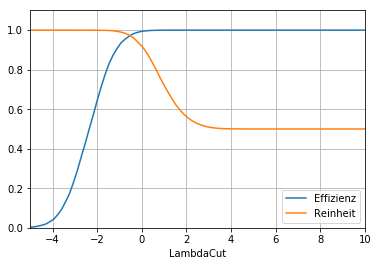

In [8]:
plt.clf()
signal = projectionsP0
print('Signalgröße =', np.size(signal))
untergrund = projectionsP1
print('Untergrundgröße =', np.size(untergrund))
truePos = 0 # We store the true positives per cut in this array
falsePos = 0
trueNeg = 0
falseNeg = 0
truePosArray = [] # We append each truePos to this array to find
signalDetected = 0
# the dependence of the true positives on the cut 
falsePosArray = [] # We choose a list because np arrays have a fixed size as far as we know
trueNegArray = []
falseNegArray = []
signalDetectedArray = [] # ICH WEIS NICHT OB MAN SO DIESES S/B UND DIE SIGNIFIKANZ BERECHNET: NACHFRAGEN!!!!!!!!!!!!!!!!!
for lambdaCut in np.linspace(-5,12.5,100):
    truePos = 0
    falsePos = 0
    trueNeg = 0
    falseNeg = 0
    signalDetected = 0
    for i in range(0, np.size(signal)): # Count through the signal
        if signal[i] <= lambdaCut:
            truePos += 1
            signalDetected += 1
        else:
            falseNeg += 1
    for i in range(0, np.size(untergrund)):
        if untergrund[i] <= lambdaCut:
            falsePos += 1
            signalDetected += 1
        else:
            trueNeg += 1
    truePosArray.append(truePos)
    falsePosArray.append(falsePos)
    trueNegArray.append(trueNeg)
    falseNegArray.append(falseNeg)
    signalDetectedArray.append(signalDetected)

truePosArray = np.asarray(truePosArray)
falsePosArray = np.asarray(falsePosArray)
trueNegArray = np.asarray(trueNegArray)
falseNegArray = np.asarray(falseNegArray)
signalDetectedArray = np.asarray(signalDetectedArray)

efficiency = (truePosArray)/(truePosArray+falseNegArray) # Effizienz
purity = (truePosArray)/(truePosArray+falsePosArray) # Reinheit

lambdaCut = np.linspace(-5,12.5,100)
plt.plot(lambdaCut, efficiency, label='Effizienz')
plt.plot(lambdaCut, purity, label='Reinheit')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
plt.axis([-5,10,0,1.1])
plt.show()

## Teilaufgabe f)
Nun wollen wir das Verhältnis von Signal zum Untergrund bestimmen. Dieses ist als Verhältnis von tp zu fp definiert, da die fp den Signalteil verunreinigen. Es wurde halblogarithmisch gezeichnet, um noch etwas zu erkennen. Unterhalb von ungefähr 3 berechnen wir nichts, da wir sonst durch null teilen würden. Das Maximum ist ausgegeben.
Analog erfolgt es für die Signifikanz.

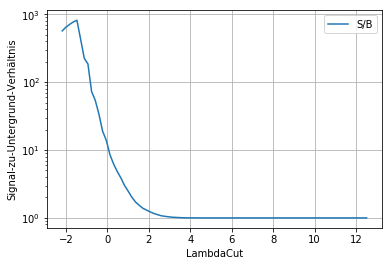

Das maximale S/B ist bei LambdaCut = -1.46464646465 und beträgt 819.0


In [28]:
falsePosArrayFore = falsePosArray[falsePosArray != 0] # Division by zero is not that great
sDurchB = truePosArray[100-np.size(falsePosArrayFore):]/falsePosArrayFore
lambdaCutCorrected = lambdaCut[100-np.size(falsePosArrayFore):] # accounting for the fact that we dont appreciate division by zero
plt.semilogy(lambdaCutCorrected, sDurchB, label='S/B')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
plt.ylabel('Signal-zu-Untergrund-Verhältnis')
plt.show()
print('Das maximale S/B ist bei LambdaCut =', lambdaCutCorrected[np.argmax(sDurchB)], 'und beträgt', np.max(sDurchB))

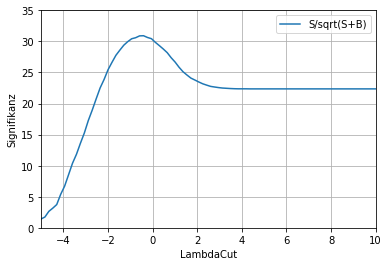

Die maximale Signifikanz ist bei LambdaCut = -0.40404040404 und beträgt 30.9165038014


In [31]:
signifikanz = truePosArray/np.sqrt(truePosArray + falsePosArray)
plt.plot(lambdaCut, signifikanz, label='S/sqrt(S+B)')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
plt.ylabel('Signifikanz')
plt.axis([-5,10,-0,35])
plt.show()
print('Die maximale Signifikanz ist bei LambdaCut =', lambdaCut[np.argmax(signifikanz)], 'und beträgt', np.max(signifikanz))

## Teilaufgabe h)
Wiederholung aller vorherigen Teilaufgaben, wenn wir als Population $P_0$ den 1000 Elemente großen Datensatz P0_1k bzw. P_0_1000 betrachten.

In [11]:
plt.clf()
muP0 = np.array([np.mean(P0_1k, axis=0)])
muP0 = np.transpose(muP0)
print('muP0 =', muP0)
muP1 = np.array([np.mean(P1, axis=0)])
muP1 = np.transpose(muP1)
print('muP1 =', muP1)

muP0 = [[-0.09576791]
 [ 2.8788468 ]]
muP1 = [[ 5.98644821]
 [ 3.0852829 ]]


In [12]:
covP0 = np.size(P0_1k)*np.cov(P0_1k, ddof = 0, rowvar=False)
print('Streumatrix der ersten Pop =', covP0)
covP1 = np.size(P1)*np.cov(P1, ddof = 0, rowvar=False)
print('Streumatrix der zweiten Pop =', covP1)
# is this the combined covariance matrix
Sw = covP0 + covP1
print('Streumatrix der Intravarianz, Sw = S0 + S1 =', Sw)
SwInv = linalg.inv(Sw)
Sb = np.dot(muP0-muP1, np.transpose(muP0-muP1))
print('Streumatrix der Intervarianz, Sb =', Sb)

Streumatrix der ersten Pop = [[ 24447.7728588   16304.6766634 ]
 [ 16304.6766634   13502.86377453]]
Streumatrix der zweiten Pop = [[ 247019.0030075   148200.30134058]
 [ 148200.30134058  109535.34588752]]
Streumatrix der Intravarianz, Sw = S0 + S1 = [[ 271466.77586629  164504.97800398]
 [ 164504.97800398  123038.20966205]]
Streumatrix der Intervarianz, Sb = [[ 36.99335291   1.25558896]
 [  1.25558896   0.04261586]]


In [13]:
matrix = np.dot(SwInv,Sb)
[d, V] = linalg.eig(matrix,right=True)
w = V[:,0]
print('Der berechnete Eigenvektor ist =', w)

Der berechnete Eigenvektor ist = [ 0.60323736 -0.79756172]


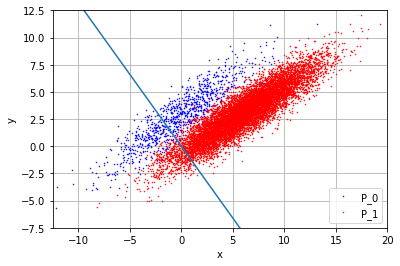

Die Geradengleichung wäre dann f(x)= -1.32213582442 * x, wenn die Gerade durch den Nullpunkt geht.


In [14]:
x0, y0 = zip(*P0_1k)
x1, y1 = zip(*P1)
linspace = np.linspace(-20,20,100)
plt.plot(x0, y0, 'b.', label='P_0', markersize=1)
plt.plot(x1, y1, 'r.', label='P_1', markersize=1)
plt.plot(linspace, w[1]/w[0]*linspace)
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-12.5,20,-7.5,12.5])
plt.show()
print('Die Geradengleichung wäre dann f(x)=', w[1]/w[0], '* x, wenn die Gerade durch den Nullpunkt geht.')

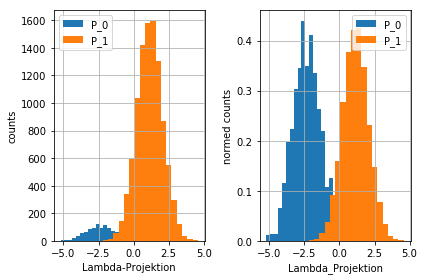

In [15]:
plt.clf()
projectionsP0 = np.dot(P0_1k, w)
projectionsP1 = np.dot(P1, w)
plt.subplot(1,2,1)
plt.hist(projectionsP0, label='P_0', bins=20)
plt.hist(projectionsP1, label='P_1', bins=20)
plt.grid()
plt.legend()
plt.xlabel('Lambda-Projektion')
plt.ylabel('counts')
plt.subplot(1,2,2)
plt.hist(projectionsP0, normed=True, label='P_0', bins=20)
plt.hist(projectionsP1, normed=True, label='P_1', bins=20)
plt.grid()
plt.legend()
plt.xlabel('Lambda_Projektion')
plt.ylabel('normed counts')
plt.tight_layout()
plt.show()

Signalgröße = 1000
Untergrundgröße = 10000


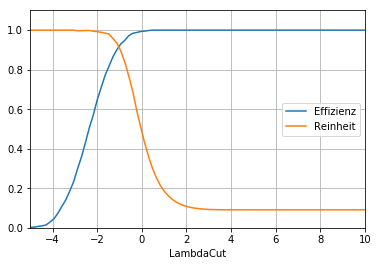

In [32]:
plt.clf()
signal = projectionsP0
print('Signalgröße =', np.size(signal))
untergrund = projectionsP1
print('Untergrundgröße =', np.size(untergrund))
truePos = 0 # We store the true positives per cut in this array
falsePos = 0
trueNeg = 0
falseNeg = 0
truePosArray = [] # We append each truePos to this array to find
signalDetected = 0
# the dependence of the true positives on the cut 
falsePosArray = [] # We choose a list because np arrays have a fixed size as far as we know
trueNegArray = []
falseNegArray = []
signalDetectedArray = [] # ICH WEIS NICHT OB MAN SO DIESES S/B UND DIE SIGNIFIKANZ BERECHNET: NACHFRAGEN!!!!!!!!!!!!!!!!!
for lambdaCut in np.linspace(-5,12.5,100):
    truePos = 0
    falsePos = 0
    trueNeg = 0
    falseNeg = 0
    signalDetected = 0
    for i in range(0, np.size(signal)): # Count through the signal
        if signal[i] <= lambdaCut:
            truePos += 1
            signalDetected += 1
        else:
            falseNeg += 1
    for i in range(0, np.size(untergrund)):
        if untergrund[i] <= lambdaCut:
            falsePos += 1
            signalDetected += 1
        else:
            trueNeg += 1
    truePosArray.append(truePos)
    falsePosArray.append(falsePos)
    trueNegArray.append(trueNeg)
    falseNegArray.append(falseNeg)
    signalDetectedArray.append(signalDetected)

truePosArray = np.asarray(truePosArray)
falsePosArray = np.asarray(falsePosArray)
trueNegArray = np.asarray(trueNegArray)
falseNegArray = np.asarray(falseNegArray)
signalDetectedArray = np.asarray(signalDetectedArray)

efficiency = (truePosArray)/(truePosArray+falseNegArray) # Effizienz
purity = (truePosArray)/(truePosArray+falsePosArray) # Reinheit

lambdaCut = np.linspace(-5,12.5,100)
plt.plot(lambdaCut, efficiency, label='Effizienz')
plt.plot(lambdaCut, purity, label='Reinheit')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
plt.axis([-5,10,0,1.1])
plt.show()

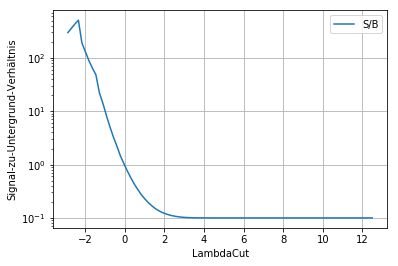

Das maximale S/B ist bei LambdaCut = -2.34848484848 und beträgt 507.0


In [33]:
falsePosArrayFore = falsePosArray[falsePosArray != 0] # Division by zero is not that great
sDurchB = truePosArray[100-np.size(falsePosArrayFore):]/falsePosArrayFore
lambdaCutCorrected = lambdaCut[100-np.size(falsePosArrayFore):] # accounting for the fact that we dont appreciate division by zero
plt.semilogy(lambdaCutCorrected, sDurchB, label='S/B')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
plt.ylabel('Signal-zu-Untergrund-Verhältnis')
plt.show()
print('Das maximale S/B ist bei LambdaCut =', lambdaCutCorrected[np.argmax(sDurchB)], 'und beträgt', np.max(sDurchB))

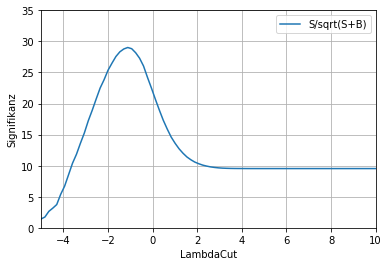

Die maximale Signifikanz ist bei LambdaCut = -1.11111111111 und beträgt 29.0213742892


In [34]:
signifikanz = truePosArray/np.sqrt(truePosArray + falsePosArray)
plt.plot(lambdaCut, signifikanz, label='S/sqrt(S+B)')
plt.grid()
plt.legend()
plt.xlabel('LambdaCut')
plt.ylabel('Signifikanz')
plt.axis([-5,10,-0,35])
plt.show()
print('Die maximale Signifikanz ist bei LambdaCut =', lambdaCut[np.argmax(signifikanz)], 'und beträgt', np.max(signifikanz))

Je kleiner das Signal, desto schlechter ist die Trennung der Populationen.
Bei der kleineren Population liegt der Schnittpunkt von Effizienz und Reinheit niedriger.
Für die größere Population beträgt das maximale Signal-zu-Untergrundverhältnis 819 und die maximale Signifikanz 31,
im Vergleich zur kleineren Population mit einem maximalen Signal-zu-Untergrundverhältnis von 507 
und einer maximalen Signifikanz von 29.

